In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Live.csv")

df = df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1)

In [6]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["status_type"] = le.fit_transform(df["status_type"])

In [8]:
df.drop('status_published', axis=1, inplace=True)

In [9]:
print(df.describe())

       status_type  num_reactions  num_comments   num_shares    num_likes  \
count  7050.000000    7050.000000   7050.000000  7050.000000  7050.000000   
mean      1.704965     230.117163    224.356028    40.022553   215.043121   
std       0.942399     462.625309    889.636820   131.599965   449.472357   
min       0.000000       0.000000      0.000000     0.000000     0.000000   
25%       1.000000      17.000000      0.000000     0.000000    17.000000   
50%       1.000000      59.500000      4.000000     0.000000    58.000000   
75%       3.000000     219.000000     23.000000     4.000000   184.750000   
max       3.000000    4710.000000  20990.000000  3424.000000  4710.000000   

         num_loves     num_wows    num_hahas     num_sads   num_angrys  
count  7050.000000  7050.000000  7050.000000  7050.000000  7050.000000  
mean     12.728652     1.289362     0.696454     0.243688     0.113191  
std      39.972930     8.719650     3.957183     1.597156     0.726812  
min       0.00

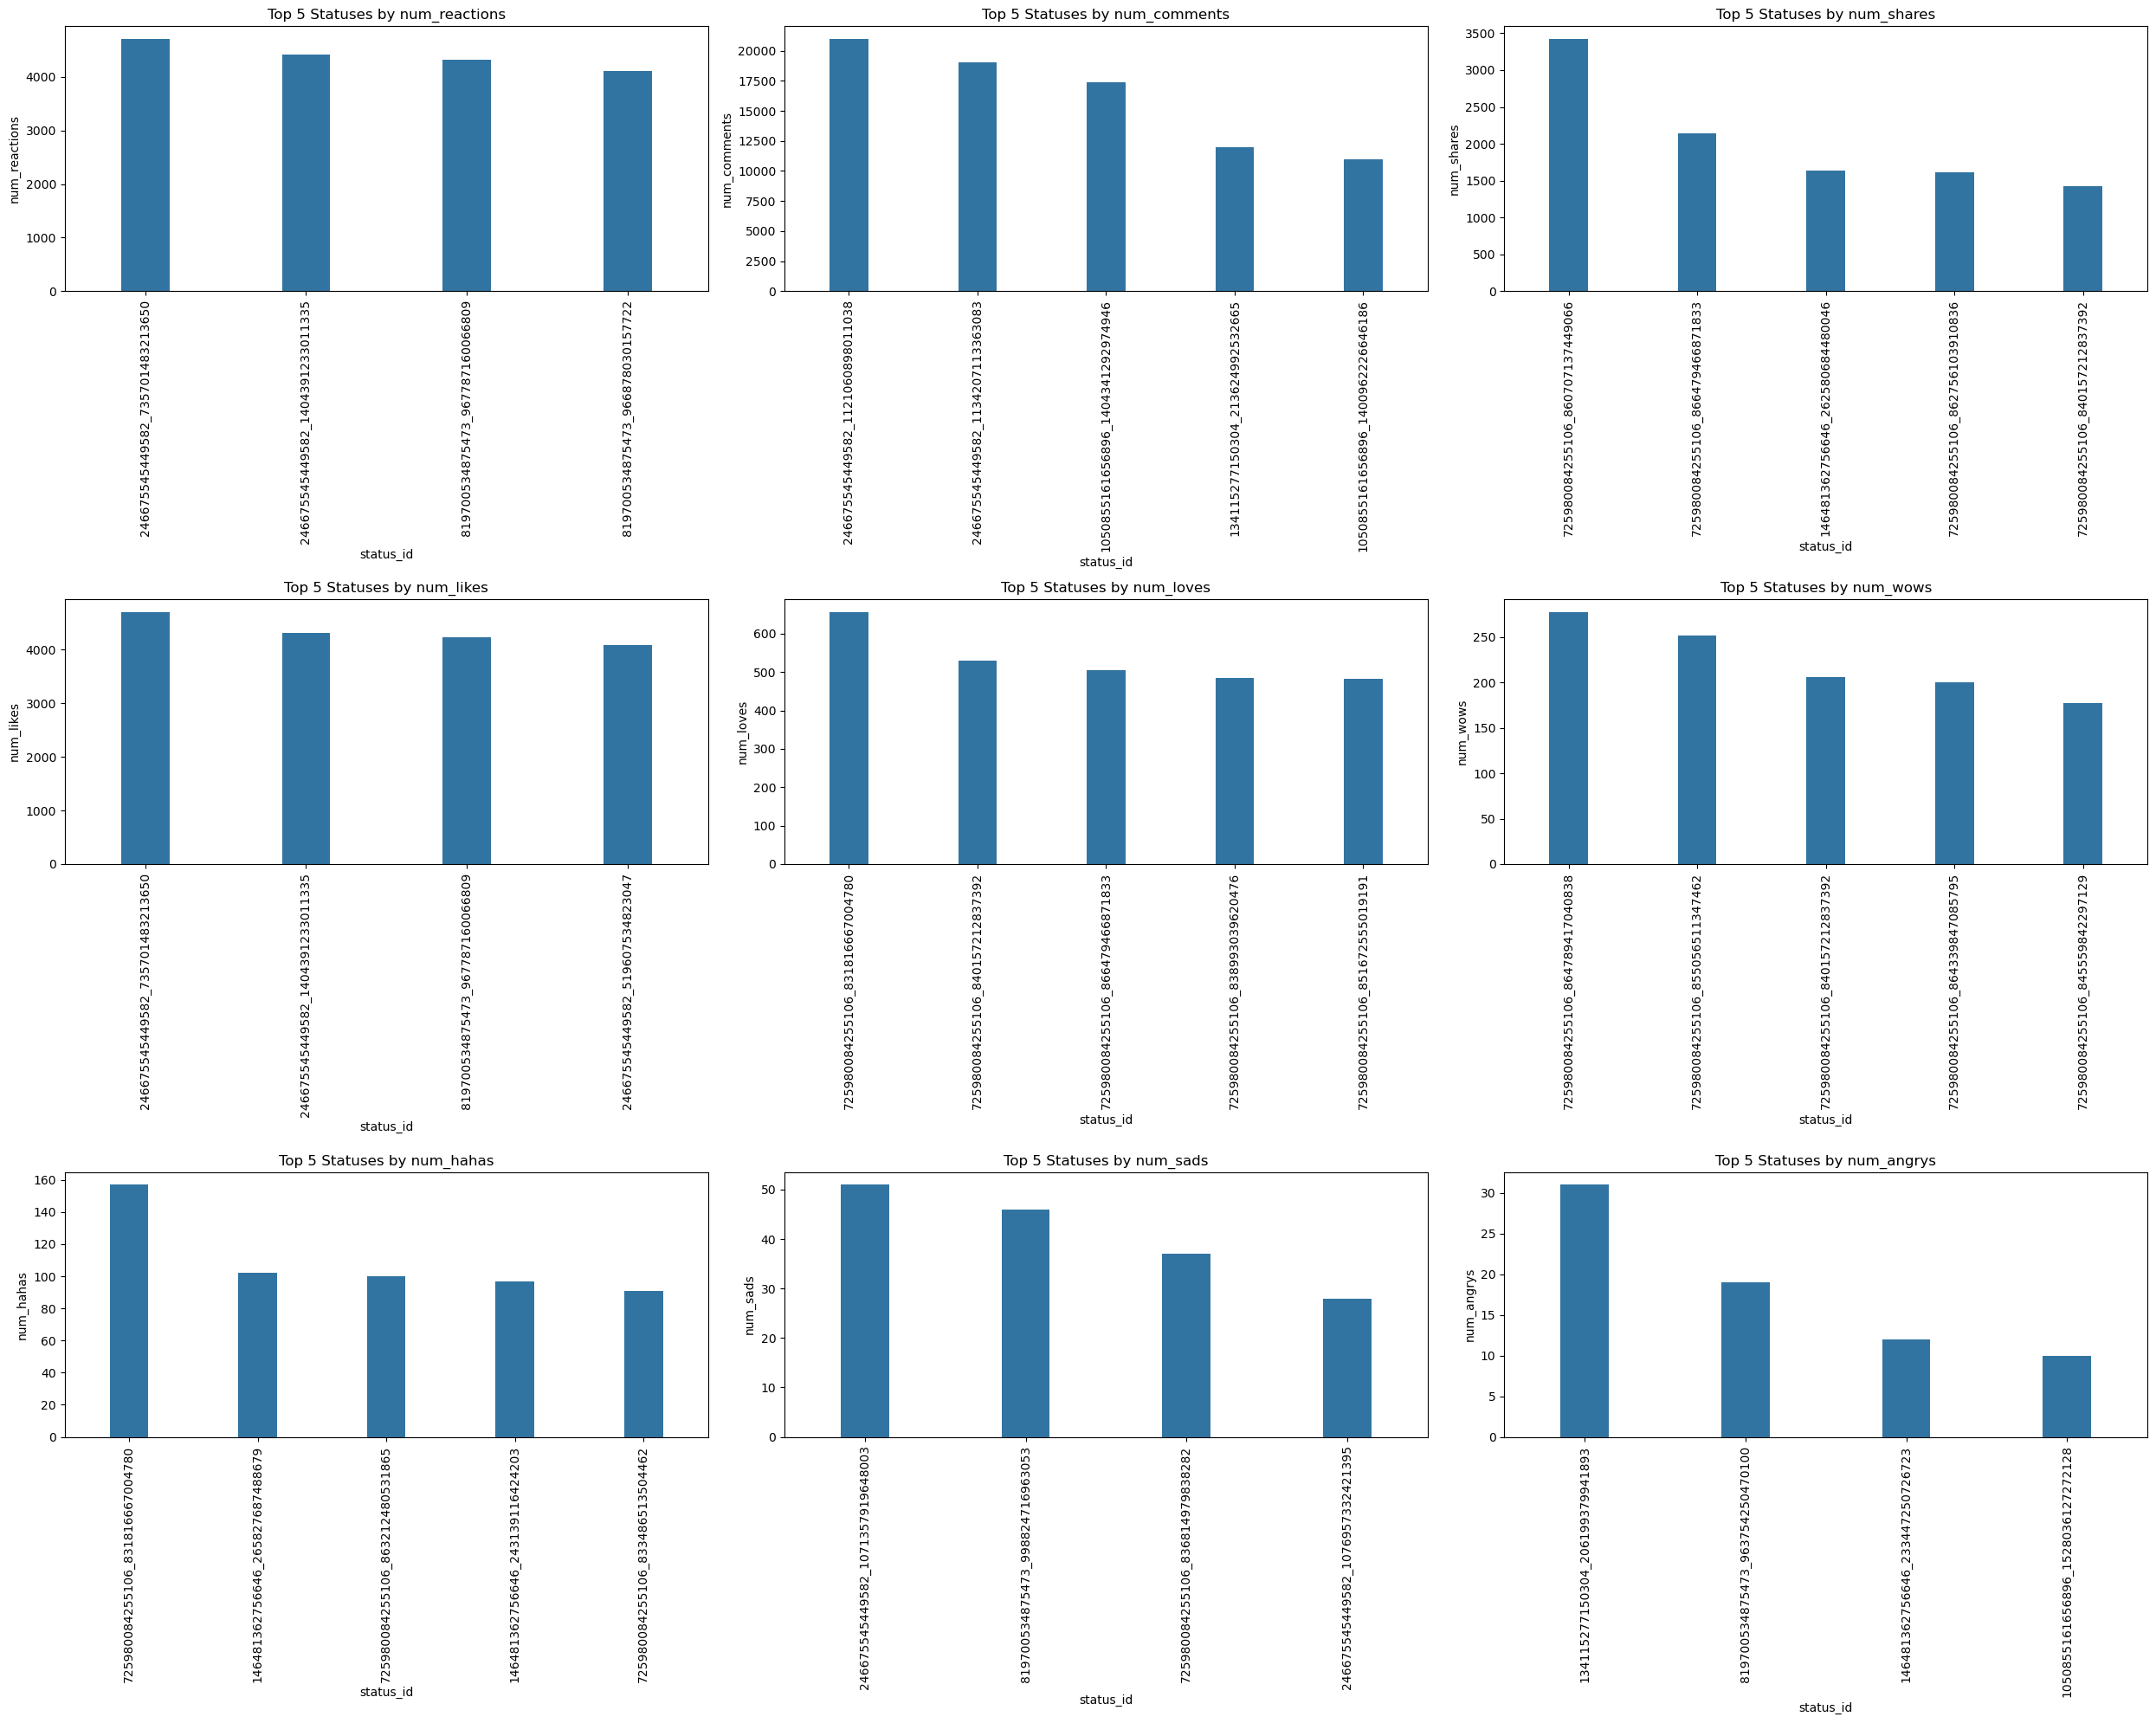

In [10]:
features = [
    'num_reactions', 'num_comments', 'num_shares', 'num_likes',
    'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'
]

# Sort and prepare data for each feature
sortedData = [df.sort_values(by=feature, ascending=False).head(5) for feature in features]

# Plotting
plt.figure(figsize=(25, 20))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.barplot(
        x=sortedData[i]['status_id'].astype(str),
        y=sortedData[i][feature],
        width=0.3
    )
    plt.title(f'Top 5 Statuses by {feature}')
    plt.xticks(rotation=90)
    plt.xlabel('status_id')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

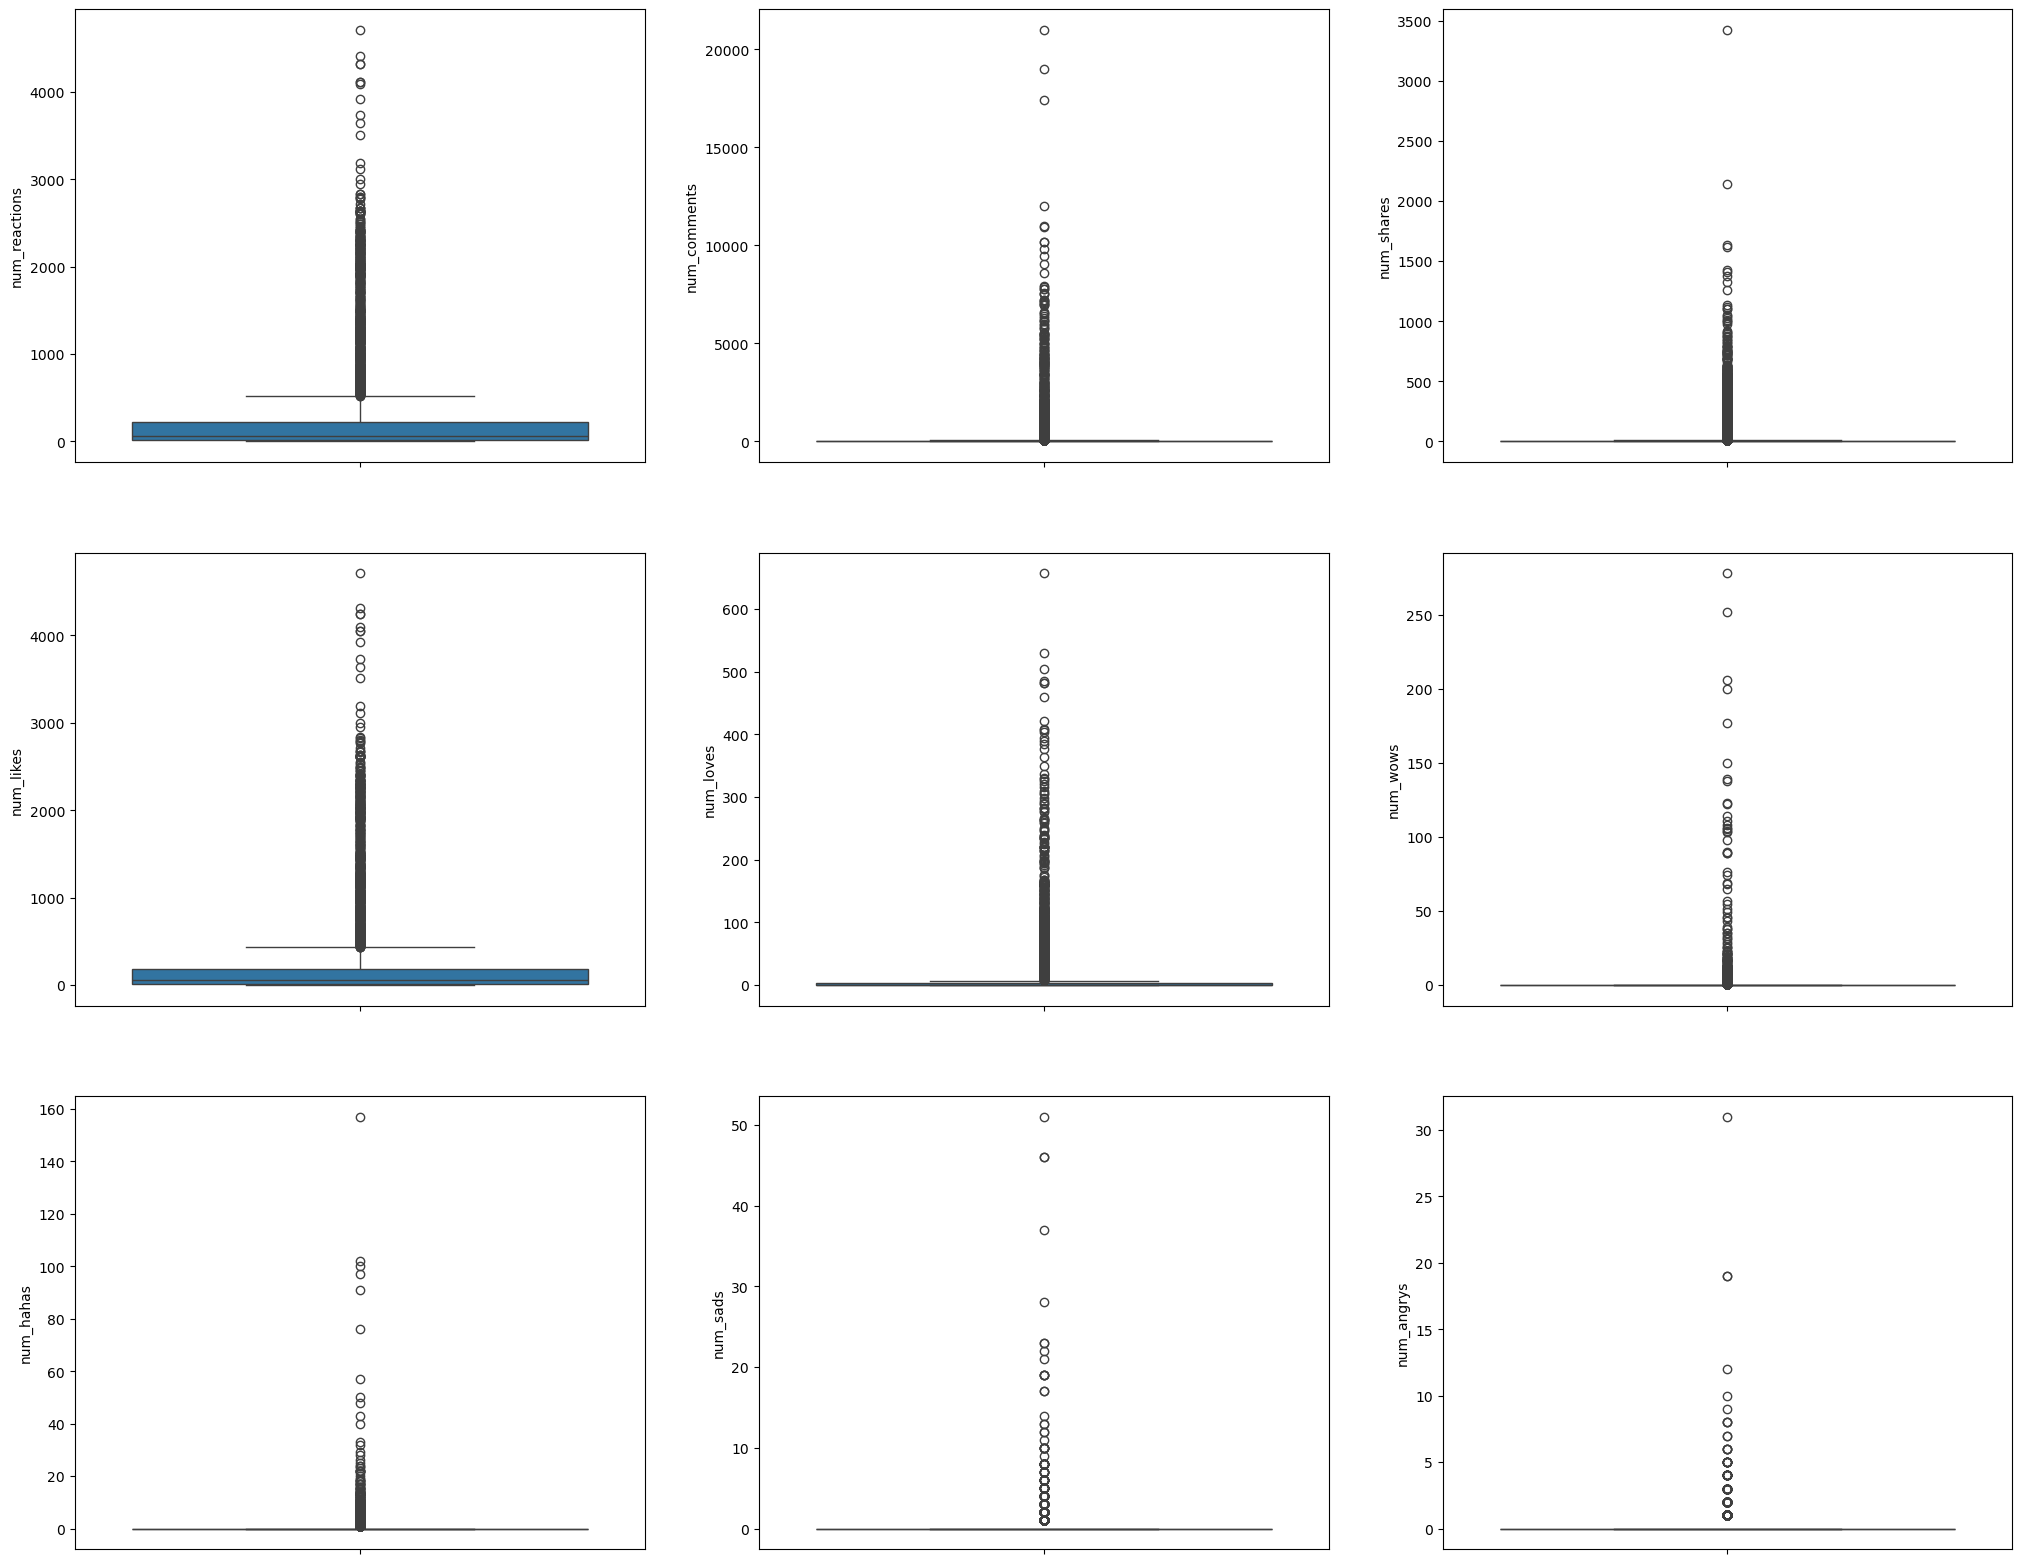

In [11]:
plt.figure(figsize = (25,20))
for i,feature in enumerate(features):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[feature])
    
plt.show()

In [12]:
# Mean of each numeric column
mean_values = df.mean(numeric_only=True)
print("Mean:\n", mean_values)

# Median of each numeric column
median_values = df.median(numeric_only=True)
print("\nMedian:\n", median_values)


Mean:
 status_type        1.704965
num_reactions    230.117163
num_comments     224.356028
num_shares        40.022553
num_likes        215.043121
num_loves         12.728652
num_wows           1.289362
num_hahas          0.696454
num_sads           0.243688
num_angrys         0.113191
dtype: float64

Median:
 status_type       1.0
num_reactions    59.5
num_comments      4.0
num_shares        0.0
num_likes        58.0
num_loves         0.0
num_wows          0.0
num_hahas         0.0
num_sads          0.0
num_angrys        0.0
dtype: float64


In [13]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,3,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,246675545449582_1649426988507757,1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
2,246675545449582_1648730588577397,3,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748
3,246675545449582_1648576705259452,1,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
4,246675545449582_1645700502213739,1,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748


In [14]:
X = df
print(X)

                              status_id  status_type  num_reactions  \
0      246675545449582_1649696485147474            3       0.646104   
1      246675545449582_1649426988507757            1      -0.173192   
2      246675545449582_1648730588577397            3      -0.006738   
3      246675545449582_1648576705259452            1      -0.257499   
4      246675545449582_1645700502213739            1      -0.037003   
...                                 ...          ...            ...   
7045  1050855161656896_1061863470556065            1      -0.305057   
7046  1050855161656896_1061334757275603            1      -0.462863   
7047  1050855161656896_1060126464063099            1      -0.493128   
7048  1050855161656896_1058663487542730            1       0.261316   
7049  1050855161656896_1050858841656528            1      -0.460702   

      num_comments  num_shares  num_likes  num_loves  num_wows  num_hahas  \
0         0.323350    1.686879   0.482727   1.983266  0.196196   0.076

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [16]:
labels = kmeans.labels_

In [17]:
print(labels)

[0 0 0 ... 1 1 1]


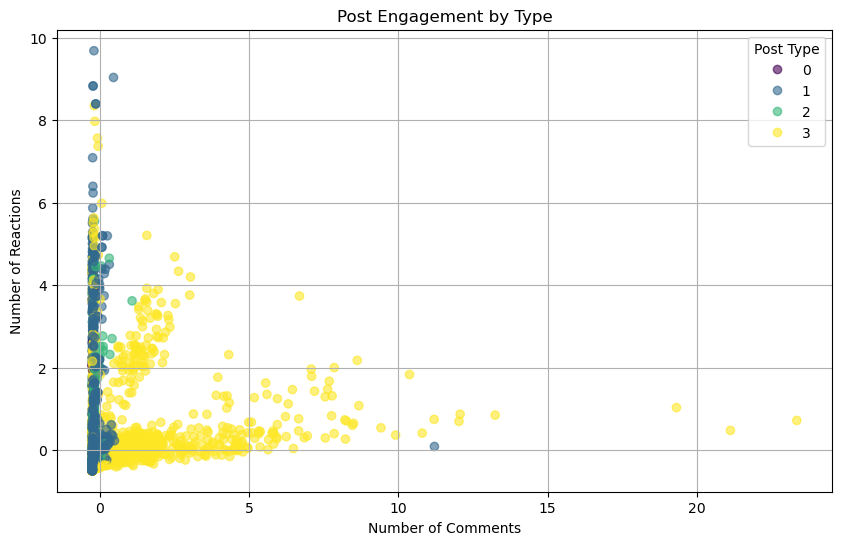

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: encode status_type to numbers for color mapping
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['status_type'])

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['num_comments'],
    df['num_reactions'],
    c=df['type_encoded'],
    cmap='viridis',
    alpha=0.6
)
plt.xlabel('Number of Comments')
plt.ylabel('Number of Reactions')
plt.title('Post Engagement by Type')

# Legend for status types
handles, _ = scatter.legend_elements()
labels = label_encoder.classes_
plt.legend(handles, labels, title='Post Type')

plt.grid(True)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_20500\1625453226.py:1: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(df['num_comments'], df['num_reactions'], c=labels, cmap='viridis')


ValueError: 'c' argument has 4 elements, which is inconsistent with 'x' and 'y' with size 7050.

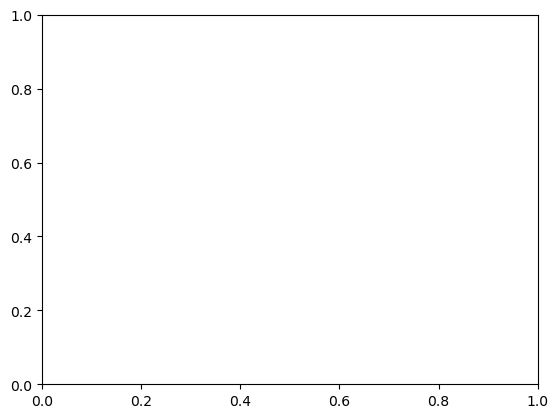

In [19]:
plt.scatter(df['num_comments'], df['num_reactions'], c=labels, cmap='viridis')
plt.xlabel('Number of Comments')
plt.ylabel('Number of Reactions')
plt.title('K-means Clustering of Facebook Posts')
plt.grid(True)
plt.show()


In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_reactions', y='num_comments', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering with 3 Clusters')  # Updated title
plt.xlabel('Number of Reactions (Scaled)')
plt.ylabel('Number of Comments (Scaled)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, marker='X', color='red', label='Centroids')
plt.legend()
plt.grid(True)
plt.show()

ValueError: Could not interpret value `Cluster` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

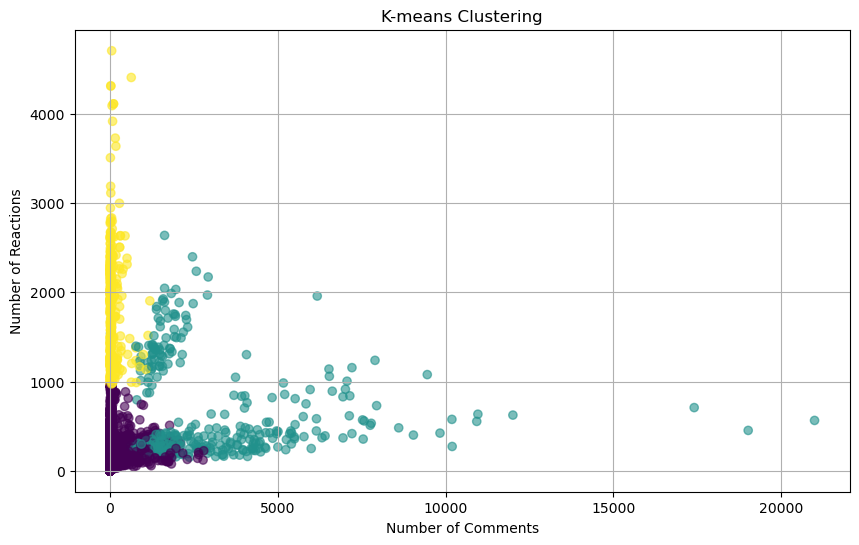

In [ ]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 2. Load Dataset
df = pd.read_csv("Live.csv")  # Replace with your actual filename

# 3. Drop Unused Columns
df = df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1)

# 4. Handle Missing Values (if any)
df = df.dropna()

# 5. Select Features for Clustering
features = ['num_reactions', 'num_comments', 'num_shares']
X = df[features]

# 6. Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 8. Add Cluster Labels to DataFrame
df['cluster'] = labels

# 9. Plot Clusters (e.g., num_comments vs. num_reactions)
plt.figure(figsize=(10, 6))
plt.scatter(
    df['num_comments'],
    df['num_reactions'],
    c=df['cluster'],
    cmap='viridis',
    alpha=0.6
)
plt.xlabel('Number of Comments')
plt.ylabel('Number of Reactions')
plt.title('K-means Clustering')
plt.grid(True)
plt.show()


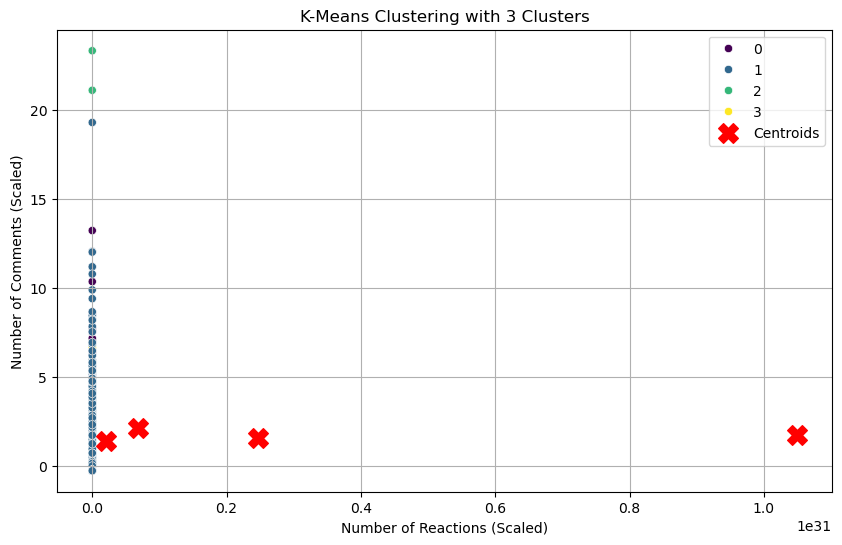

In [20]:
# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  # You can adjust n_clusters
kmeans.fit(X)
df['Cluster'] = kmeans.labels_ # Add cluster labels to the original dataframe
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_reactions', y='num_comments', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering with 3 Clusters')  # Updated title
plt.xlabel('Number of Reactions (Scaled)')
plt.ylabel('Number of Comments (Scaled)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, marker='X', color='red', label='Centroids')
plt.legend()
plt.grid(True)
plt.show()